#**Predição de Preços de Veículos**

### **Visão Geral do Projeto**
Este projeto de machine learning tem como objetivo desenvolver um modelo preditivo para estimar o preço de veículos com base em suas características. Utilizando um conjunto de dados diversificado, o projeto abrange desde a limpeza e análise exploratória dos dados até o treinamento, avaliação e seleção do melhor algoritmo para a tarefa.

### **Metodologia**
Análise e Limpeza de Dados: O processo iniciou-se com a importação dos dados e

1.   **Análise e Limpeza de Dados**: O processo iniciou-se com a importação dos dados e uma análise para identificar e tratar valores ausentes e inconsistentes, garantindo a qualidade e a confiabilidade das informações.
2.  **Análise Exploratória de Dados (EDA)**: Durante a exploração, foram identificados insights cruciais:

 - uma análise para identificar e tratar valores ausentes e inconsistentes, garantindo a qualidade e a confiabilidade das informações.

 - Um aumento significativo de quase 35% no preço médio dos veículos entre 2023 e 2025.

 - A presença de outliers nas colunas price e mileage, que foram tratados com o método de Intervalo Interquartil (IQR) para evitar distorções no modelo.

 - Uma baixa correlação linear entre as variáveis numéricas e o preço, indicando a necessidade de modelos mais complexos para capturar as relações não-lineares.

3. **Engenharia de Features**: As variáveis categóricas (como marca, modelo e cor) foram convertidas em formato numérico através do LabelEncoder para serem compatíveis com os algoritmos de machine learning.

4. **Treinamento e Avaliação de Modelos**: Foram treinados e avaliados cinco modelos de regressão diferentes:

 - Regressão Linear

 - Regressão Ridge

 - Random Forest

 - Gradient Boosting

 - XGBoost

### **Resultados e Conclusão**
Após a comparação de desempenho utilizando o Score R² como métrica principal, o modelo XGBoost demonstrou superioridade, alcançando uma pontuação de aproximadamente 80%. Isso indica que o modelo é capaz de explicar 80% da variabilidade nos preços dos veículos, tornando-se uma ferramenta preditiva robusta e eficaz.

- O modelo final foi salvo (xgb_model.joblib) e está pronto para ser implementado em aplicações para realizar previsões de preços de forma precisa.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Vehicle Price.csv')

In [ ]:
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [ ]:
print('Shape do dataframe:\n', df.shape)
print('-=' * 20)
print('Informações do dataframe:')
df.info()
print('-=' * 20)
print('Quantidade de nulos no dataframe:\n', df.isnull().sum())
print(f'Porcentagem de valores nulos no df: aprox. {(df.isnull().sum().sum() / len(df)) * 100:.2f}%')

Shape do dataframe:
 (1002, 17)
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Informações do dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-

Após a verificação dos valores do dataframe, posso começar a fazer alguns tratamentos. Para tratamento de valores nulos vi que posso começar a tratar algumas colunas, como:
- descripiton
- price
- cylinders
- mileage
- interior_color

**obs.:** Existe mais colunas com dados nulos, porém são poucos dados, então posso fazer um tratamento mais simples. Porém, nas colunas que especifiquei é necessario um pouco mais de atenção por ter um número mais significatifo, apesar de ainda sim serem poucos dados.

In [ ]:
def tratar_nulos(df, lim=10):
    """
    Remove ou trata valores nulos.
    - Se a coluna tiver até `lim` nulos, remove as linhas que contêm esses nulos.
    - Caso contrário, preenche nulos com a mediana (para numéricos) ou o valor mais frequente (para categóricos).
    """
    for col in df.columns:
        n_nulos = df[col].isnull().sum()

        if n_nulos == 0:          # se não tiver nulos, ele irá passar para próxima coluna
            continue

        if n_nulos <= lim:        # se tiver poucos nulos ele irá descartar linhas
            df.dropna(subset=[col], inplace=True)
        else:                     # se tiver muitos nulos, para colunas numéricas ele irá substiuir os valores nulos pela a mediana, já as colunas categoricas, a moda.
            if pd.api.types.is_numeric_dtype(df[col]):
                df[col].fillna(df[col].median(), inplace=True)
            else:
                modo = df[col].mode().iloc[0]
                df[col].fillna(modo, inplace=True)

tratar_nulos(df)

import warnings
warnings.simplefilter("ignore", FutureWarning) # Só ignora um aviso de que uma função específica será retirada no futuro

/tmp/ipython-input-5-1273526193.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(modo, inplace=True)
/tmp/ipython-input-5-1273526193.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

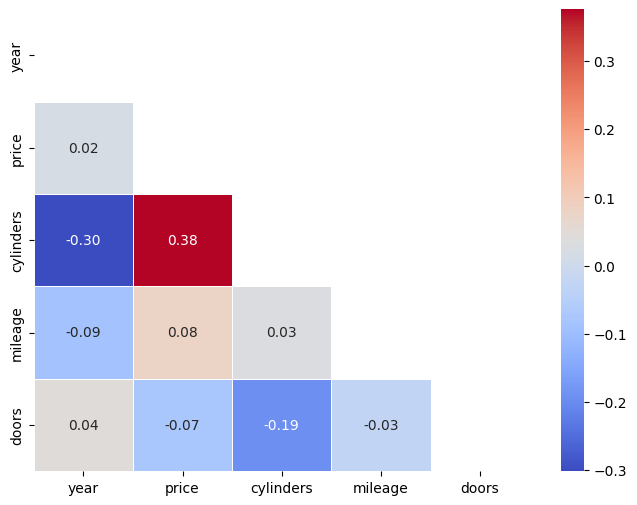

In [ ]:
numeric_cols = df.select_dtypes(include='number')
numeric_cols_corr = numeric_cols.corr()

mask = np.triu(np.ones_like(numeric_cols_corr, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(data=numeric_cols_corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.show()

**Analisando a correlação dos dados numéricos através do gráfico de calor**

Como a correlação entre as variáveis é, em sua maioria, fraca, nenhuma variável isoladamente parece ter um forte impacto linear sobre o preço, o que sugere que modelos mais complexos ou com múltiplas variáveis podem ser necessários para capturar as relações não-lineares presentes nos dados.

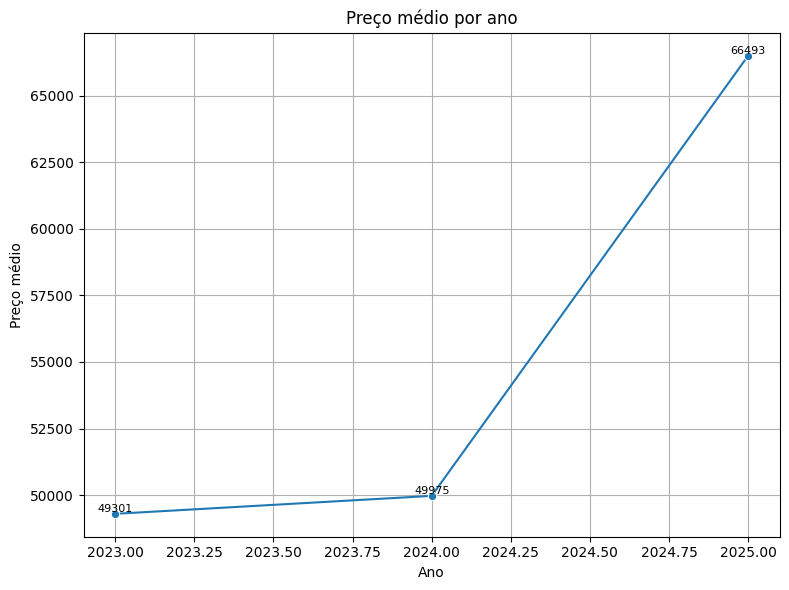

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

group_price_year = df.groupby('year')['price'].mean().sort_index()

plt.figure(figsize=(8, 6))
sns.lineplot(data=group_price_year, marker='o')

for ano, preco in group_price_year.items():
    plt.text(ano, preco, f'{preco:.0f}', ha='center', va='bottom', fontsize=8)

plt.title('Preço médio por ano')
plt.xlabel('Ano')
plt.ylabel('Preço médio')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
aumento = ((66500 - 49300) / 49300) * 100
aumento

34.88843813387424

**Analisando a média dos preços dos carros por ano. De 2023 a 2025**

A partir da análise do gráfico gerado, conseguimos ver que a média de preço de carros teve uma alta significativa, com um crescimento de aproximadamente 34.89 %

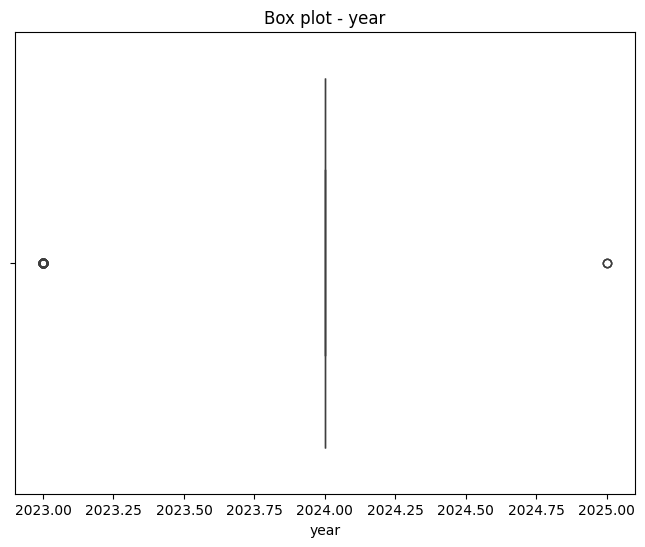

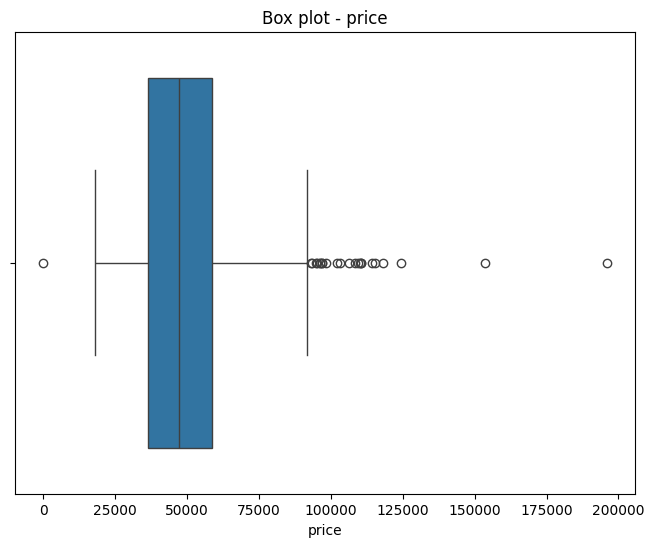

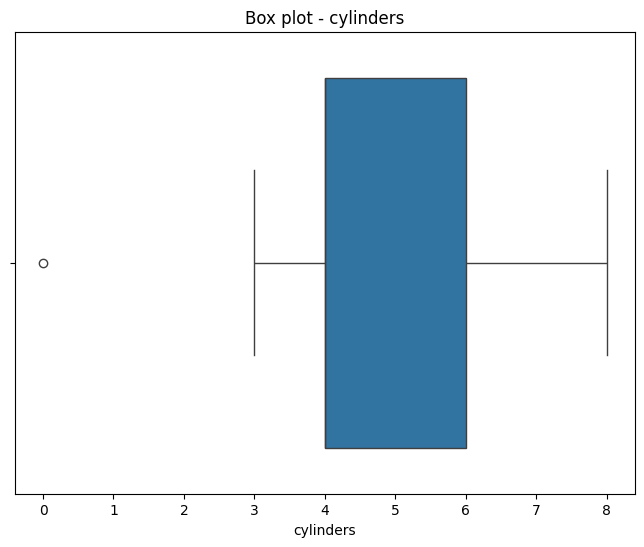

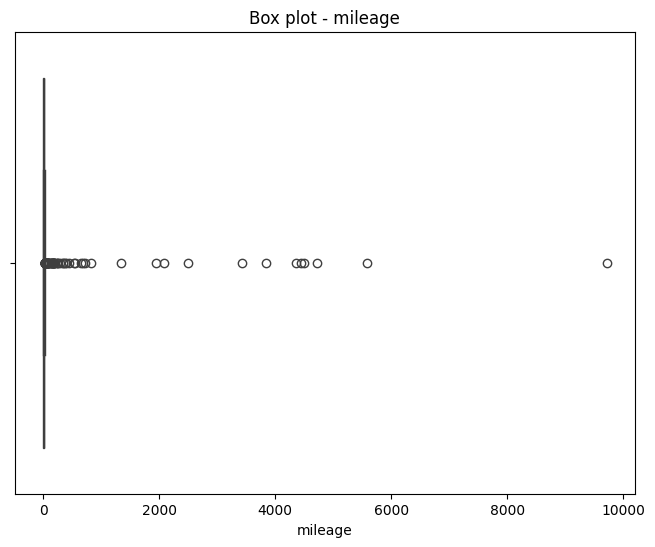

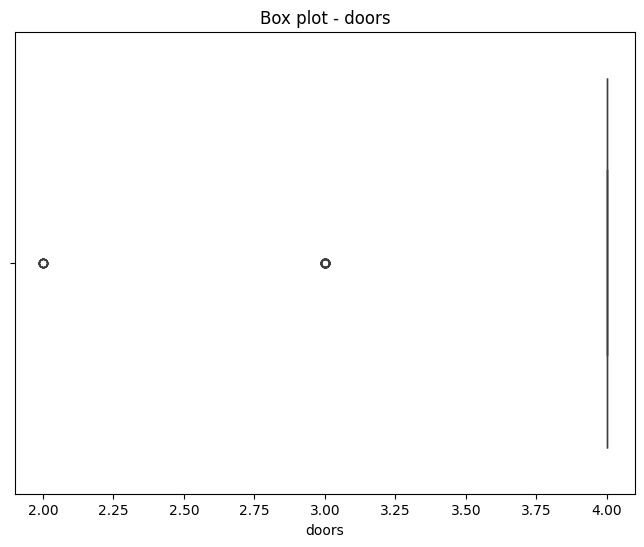

In [ ]:
for coluna in numeric_cols.columns:
    plt.figure(figsize=(8, 6))
    plt.title(f'Box plot - {coluna}')
    sns.boxplot(x=df[coluna])
    plt.xlabel(coluna)
    plt.show()

Vemos que com a criação dos gráficos de boxplot, as colunas **mileage** e **price** possuem uma quantidade significativa de outliers. Com essa informação pude saber o que fazer a seguir, tratar os dados discrepantes dessas colunas com mais outliers

In [ ]:
def tratar_outliers_iqr(df, coluna):
    """
    Trata os outliers de uma coluna específica do DataFrame usando o método IQR Capping.
    Argumentos:
    df (pd.DataFrame): O DataFrame a ser modificado.
    coluna (str): O nome da coluna para tratar os outliers.
    """
    print(f"--- Tratando outliers da coluna: {coluna} ---")
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"Limite Inferior (aceitável): {limite_inferior:.2f}")
    print(f"Limite Superior (aceitável): {limite_superior:.2f}")

    # Conta o número de outliers
    outliers_acima = df[df[coluna] > limite_superior].shape[0]
    outliers_abaixo = df[df[coluna] < limite_inferior].shape[0]
    print(f"Encontrados {outliers_acima} outliers acima do limite superior.")
    print(f"Encontrados {outliers_abaixo} outliers abaixo do limite inferior.")

    # Aplica o capping (achatamento)
    df[coluna] = np.where(
        df[coluna] > limite_superior,
        limite_superior,
        np.where(
            df[coluna] < limite_inferior,
            limite_inferior,
            df[coluna]
        )
    )
    print("Outliers substituídos pelos limites definidos.\n")

tratar_outliers_iqr(df, 'price')
tratar_outliers_iqr(df, 'mileage')

--- Tratando outliers da coluna: price ---
Q1: 36600.00, Q3: 58709.00, IQR: 22109.00
Limite Inferior (aceitável): 3436.50
Limite Superior (aceitável): 91872.50
Encontrados 23 outliers acima do limite superior.
Encontrados 1 outliers abaixo do limite inferior.
Outliers substituídos pelos limites definidos.

--- Tratando outliers da coluna: mileage ---
Q1: 4.00, Q3: 13.00, IQR: 9.00
Limite Inferior (aceitável): -9.50
Limite Superior (aceitável): 26.50
Encontrados 101 outliers acima do limite superior.
Encontrados 0 outliers abaixo do limite inferior.
Outliers substituídos pelos limites definidos.



In [ ]:
df.to_csv('Vehicle Price Treatment.csv', index=True)

# **Modelagem**

Agora que a Análise Exploratória de Dados (EDA) foi concluída, iniciarei a etapa de modelagem para prever os preços de carros com base nos dados disponíveis. Pretendo testar diferentes algoritmos de machine learning e, em seguida, comparar o desempenho de cada modelo. Somente após essa avaliação poderei definir qual modelo será o mais adequado para realizar previsões futuras com maior precisão.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()

for col in categorical_cols:
  df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,220,234,14,134,2024,74600.0,23,6.0,4,10.0,17,141,6,4.0,251,35,1
1,212,557,14,55,2024,50170.0,64,6.0,4,1.0,17,78,6,4.0,141,35,1
2,154,26,9,143,2024,91872.5,48,8.0,4,0.0,30,46,6,4.0,231,81,1
3,7,728,7,29,2023,46835.0,13,8.0,4,26.5,17,105,6,4.0,253,5,0
4,301,66,22,2,2024,81663.0,19,6.0,0,10.0,7,75,5,4.0,202,5,1


Usei a função **LabelEncoder** do Scikit-learn para transformar variáveis categóricas em valores numéricos, facilitando o processamento dos dados pelo modelo

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    'Regressão Linear': LinearRegression(),
    'Regressão Ridge': Ridge(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

results = {}

print("--- Iniciando Treinamento e Avaliação dos Modelos ---")
for name, model in models.items():
    print(f"Treinando {name}...")

    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = model.predict(X_test)

    # Calcular as métricas de avaliação
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Armazenar os resultados
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    }
    print(f"{name} treinado e avaliado com sucesso.\n")

print("--- Todos os modelos foram avaliados. ---")

# 5. Exibir os resultados em um DataFrame para fácil comparação
results_df = pd.DataFrame(results).T.sort_values(by='R²', ascending=False)

print("\n--- Comparação de Desempenho dos Modelos ---")
print(results_df)

--- Iniciando Treinamento e Avaliação dos Modelos ---
Treinando Regressão Linear...
Regressão Linear treinado e avaliado com sucesso.

Treinando Regressão Ridge...
Regressão Ridge treinado e avaliado com sucesso.

Treinando Random Forest...
Random Forest treinado e avaliado com sucesso.

Treinando Gradient Boosting...
Gradient Boosting treinado e avaliado com sucesso.

Treinando XGBoost...
XGBoost treinado e avaliado com sucesso.

--- Todos os modelos foram avaliados. ---

--- Comparação de Desempenho dos Modelos ---
                            MAE           MSE          RMSE        R²
XGBoost             4814.090342  6.223009e+07   7888.605260  0.797306
Random Forest       4925.793257  7.006234e+07   8370.324859  0.771795
Gradient Boosting   5555.994800  7.480040e+07   8648.722536  0.756362
Regressão Linear   11017.741466  2.095067e+08  14474.345605  0.317601
Regressão Ridge    11034.347395  2.102017e+08  14498.333829  0.315337


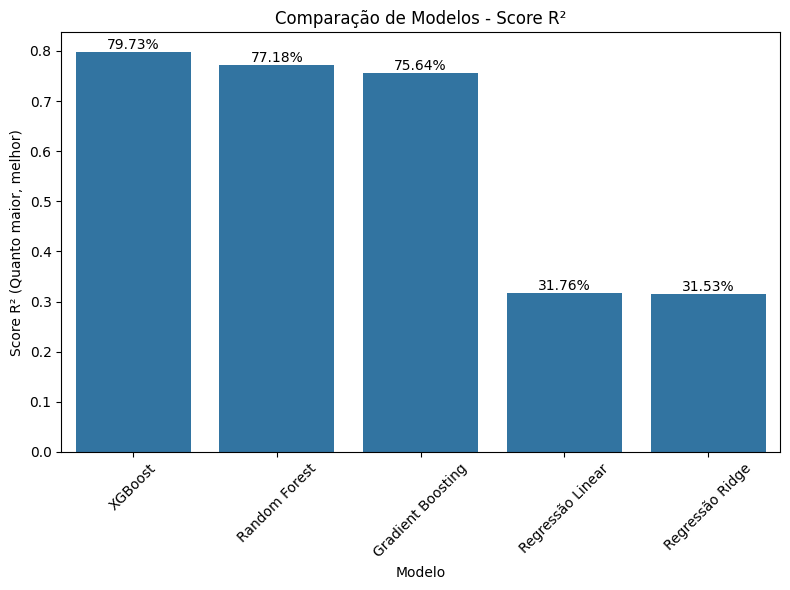

In [ ]:
plt.figure(figsize=(8, 6))

ax = sns.barplot(x=results_df.index, y=results_df['R²'])

plt.title('Comparação de Modelos - Score R²')
plt.xlabel('Modelo')
plt.ylabel('Score R² (Quanto maior, melhor)')
plt.xticks(rotation=45)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height,
        s=f'{height:.2%}',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

Treinei 5 modelos para verificar entre eles qual melhor R². Foram os modelos:
- XGBoost
- Random Forest
- Gradient Boosting
- Linear Regression
- Ridge Regression

Entre esse modelos, o que apresentou a melhor performance foi o **XGBoost**, com R² de 80% aproximadamente. Sabendo disso, irei salvar esse modelo para previsão de preços de carros posteriormente

In [ ]:
from joblib import dump, load

In [ ]:
xgb = models['XGBoost']
dump(xgb, 'xgb_model.joblib')

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)